<a href="https://colab.research.google.com/github/MinhAnh99/Python_Cohort-Analysis/blob/main/Minh_Anh_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data loading and cleaning
# Loading dataset
transaction = pd.read_excel('HomeTest 1 - KPMG Data.xlsx')
# View data
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


In [2]:
# Data loading and cleaning
# Loading dataset
transaction = pd.read_excel('HomeTest 1 - KPMG Data.xlsx')
# View data
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
# Checking and working with missing value
# Inspect missing values in the dataset
print(transaction.isnull().values.sum())


1542


In [ ]:
transaction = transaction.drop_duplicates()
transaction = transaction.dropna(subset=['customer_id'])

In [3]:
# Count the number of null in the dataset to verify
print(transaction.isnull().values.sum())
print(transaction.info())


1542
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19

In [4]:
# Count the number of NaNs in the dataset and print the counts to verify
print(transaction.isnull().values.sum())

1542


In [5]:
# Assigned the cohorts and calculated the monthly offset
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1)


In [6]:
# Create transaction_date column based on month and store in TransactionMonth
transaction['TransactionMonth'] = transaction['transaction_date'].apply(get_month)

In [7]:
# Grouping by customer_id and select the InvoiceMonth value
grouping = transaction.groupby('customer_id')['TransactionMonth']

In [8]:
# Assigning a minimum InvoiceMonth value to the dataset
transaction['CohortMonth'] = grouping.transform('min')

In [9]:
# printing some first rows
print(transaction.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date TransactionMonth  \
0       71.49     

In [10]:
#Calculating time offset in Month as Cohort Index
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day


In [11]:
#date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(transaction, 'TransactionMonth')

In [12]:
#date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(transaction, 'CohortMonth')

In [13]:
# get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month


In [16]:
transaction['CohortIndex'] = years_diff * 12 + months_diff  + 1
print(transaction.head(10))

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   
5               6          25         2339       2017-03-08           1.0   
6               7          22         1542       2017-04-21           1.0   
7               8          15         2459       2017-07-15           0.0   
8               9          67         1305       2017-08-10           0.0   
9              10          12         3262       2017-08-30           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1   

In [20]:
# Counting daily active user from each chort
grouping = transaction.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')
# Printing top 5 rows of Dataframe
cohort_data.head(5)

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [21]:
# Calculate business metrics: Retention rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')

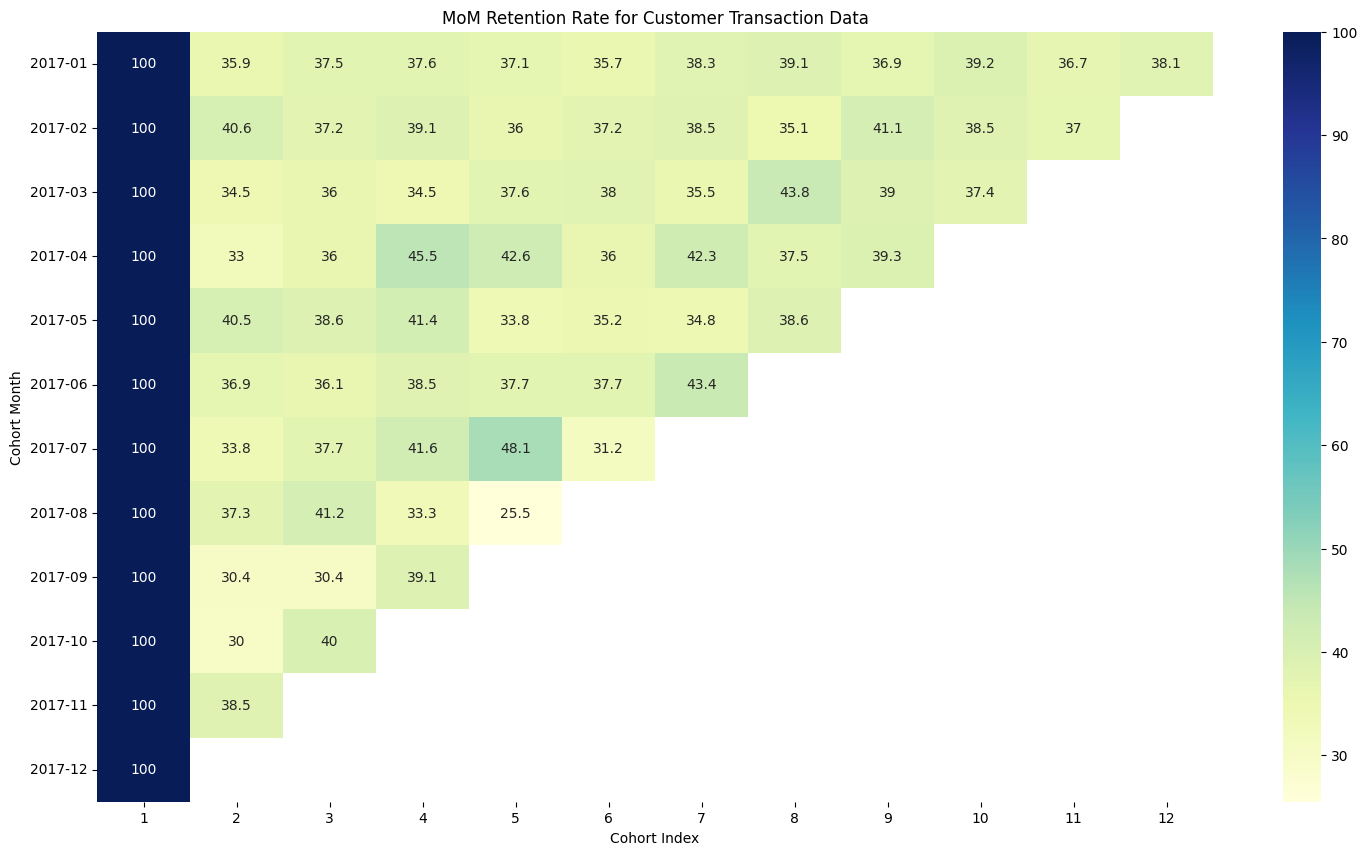

In [22]:
#Plotting Heatmap for Retention Table

plt.figure(figsize = (18,10))

plt.title('MoM Retention Rate for Customer Transaction Data')

sns.heatmap(retention, annot = True, cmap="YlGnBu", fmt='g')

plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.yticks(rotation = 'horizontal')

plt.show()

**Insights**


- KPMG's year-to-date retention rate is pretty good, 30% or more.
- Customers who place orders at the beginning of January, February and March are stability (around 33% to 43.8%)
- From mid-year: April July tend to order stable, and relatively higher than the rest months of the year.
- After 5 months of operation, customers who registered and placed their first order in July 2017 have a strong retention rate (up to 48.1%).

**Recommendations**
- With the goal to increase the retention over the months, there should be attractive specials for customers in the first few months of the year.
- Mid-year months have higher retention rates than other months, need to find out reasons with related data and visualization of other data to apply to the remaining months of the year.

